## Three Observable Trends
- Based on tumor volume, metastatic sites, and survival rate, Capomulin was the most effective drug when compared to Infubinol and Ketapril
- Capomulin was the only drug successful in reducing tumor volume over a 45 day period
- Infubinol and Ketapril results were in line with the placebo leading to the conclusion that they are not anymore effective than a placebo

In [1]:
#Magic Function and Dependencies
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

druglist = ['Capomulin','Infubinol','Ketapril','Placebo']

In [2]:
#import files and merge to create dataframe
filepath = os.path.join("..","..","UCBBEL201902DATA2","05-Matplotlib","Homework","Instructions","Pymaceuticals","data",
                        "clinicaltrial_data.csv")
trialdata = pd.read_csv(filepath)

filepath = os.path.join("..","..","UCBBEL201902DATA2","05-Matplotlib","Homework","Instructions","Pymaceuticals","data",
                        "mouse_drug_data.csv")

mousedata = pd.read_csv(filepath)

df = pd.merge(trialdata, mousedata, on='Mouse ID', how="inner")

#filter dataframe to only include Capomulin, Infubinol, Ketapril, Placebo
df = df.loc[df['Drug'].isin(druglist)]

drugdf = df.groupby(['Drug', 'Timepoint']).mean()
drugdf = drugdf.reset_index(level='Timepoint')

## Tumor Volume, Metastatic Sites, Survival

In [3]:
#Tumor Volume
tumordict = {key:drugdf.loc[key,'Tumor Volume (mm3)'] for key in drugdf.index.unique()}

#Metastatic Site
metastaticdict = {key:drugdf.loc[key, 'Metastatic Sites'] for key in drugdf.index.unique()}

#Survival (# of mice)
drugdf = df.groupby(['Drug', 'Timepoint']).count()
drugdf = drugdf.reset_index(level='Timepoint')

survivaldict = {key:drugdf.loc[key, 'Mouse ID'] for key in drugdf.index.unique()}

combineddict = {'Tumor Volume (mm3)':tumordict, 'Metastatic Sites':metastaticdict, 'Survival':survivaldict}

<IPython.core.display.Javascript object>


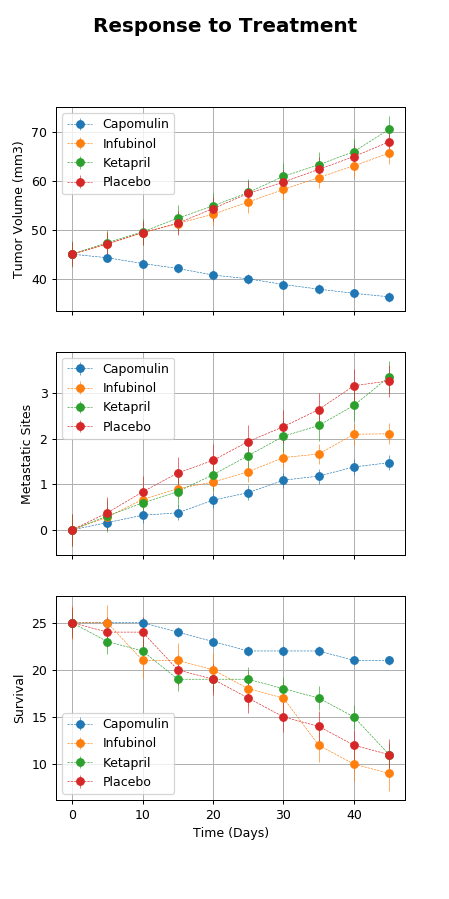

In [5]:
#plot the results (3 subplots)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5,10));
x_axis = drugdf['Timepoint'].unique()

fig.suptitle('Response to Treatment', fontsize=16, fontweight="bold");

i=1
for series in combineddict:
    for drug in combineddict[series]:
        sem = combineddict[series][drug].sem()
        globals()['ax%s' % i].errorbar(x_axis,combineddict[series][drug],yerr=sem, fmt="o", 
            alpha=1, label=drug, linewidth=0.5, linestyle='--')
        globals()['ax%s' % i].legend(loc="best")
        globals()['ax%s' % i].grid(True)
        globals()['ax%s' % i].set_ylabel(series)
        
    i+=1

ax3.set_xlabel('Time (Days)');

## Tumor Volume % Change

In [6]:
drugdf = df.groupby(['Drug', 'Timepoint']).mean()
drugdf = drugdf.reset_index(level='Timepoint')

#Tumor volume change
endingtumor = drugdf.loc[drugdf['Timepoint'] == 45,'Tumor Volume (mm3)']
startingtumor = drugdf.loc[drugdf['Timepoint'] == 0,'Tumor Volume (mm3)']

tumorchange = (endingtumor.divide(startingtumor) - 1) * 100


<IPython.core.display.Javascript object>


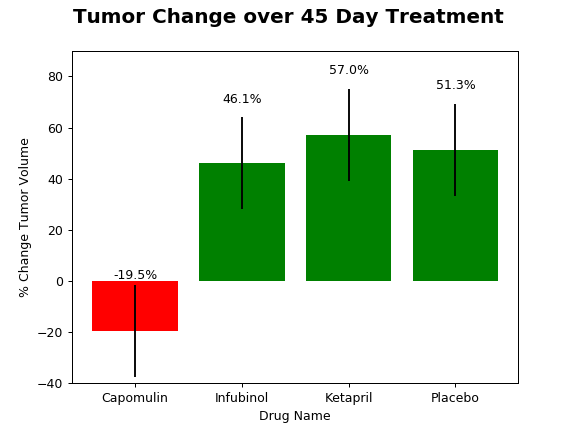

In [7]:
#plot the results
fig, ax = plt.subplots()

fig.suptitle('Tumor Change over 45 Day Treatment', fontsize=16, fontweight="bold");

colorlist =['r' if _ < 0 else 'g' for _ in tumorchange]

plot = ax.bar(tumorchange.index.unique(),tumorchange, color=colorlist, yerr = tumorchange.sem())

ax.set_ylabel("% Change Tumor Volume");
ax.set_xlabel("Drug Name");
ax.set_ybound(-40,90)

#plot data labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height + 20,'{:.1%}'.format(height/100), ha='center', va='bottom')

autolabel(plot)